<a href="https://colab.research.google.com/github/AnandaSheva/Artificial-Intelligence/blob/main/2217051096_Ananda_Sheva_Hidayat_B_Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ananda Sheva Hidayat <br>
NPM : 2217051096 <br>
Kelas : B <br>


Dodi berada dalam kebingungan dikarenakan tidak tahu smartphone mana yang harus dibeli. Akhirnya ia memutuskan untuk membeli smartphone terbaik berdasarkan dua parameter: Harga dan Spesifikasi.


Harga(Murah & Mahal) dan Spesifikasi(Rendah & Tinggi)

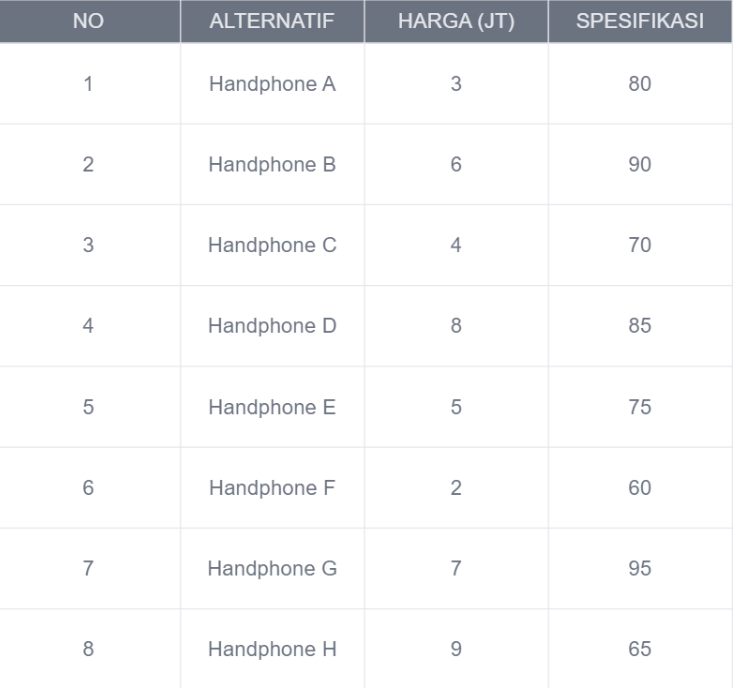

Bantulah Dodi dalam menentukan pilihannya menggunakan Fuzzy Logic Tsukamoto

# Library Fuzzy

In [ ]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 10.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=d4f4a59806adcddcd7ec9e82c4566082a3d78931457c7ee0c0ffa949bdb52e4f
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


# Library

In [ ]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Dataset

In [ ]:
df = pd.DataFrame({
    'Nama': ['Smartphone A', 'Smartphone B', 'Smartphone C', 'Smartphone D', 'Smartphone E', 'Smartphone F', 'Smartphone G', 'Smartphone H'],
    'Harga': [3, 6, 4, 8, 5, 2, 7, 9],
    'Spesifikasi': [80, 90, 70, 85, 75, 60, 95, 65]
})

df

,Nama,Harga,Spesifikasi
0,Smartphone A,3,80
1,Smartphone B,6,90
2,Smartphone C,4,70
3,Smartphone D,8,85
4,Smartphone E,5,75
5,Smartphone F,2,60
6,Smartphone G,7,95
7,Smartphone H,9,65


# Train Data

In [ ]:
# Mendefinisikan Parameter yang digunakan
harga = ctrl.Antecedent(np.arange(0, 11, 1), 'harga')
spesifikasi = ctrl.Antecedent(np.arange(0, 101, 1), 'spesifikasi')
keputusan = ctrl.Consequent(np.arange(0, 101, 1), 'keputusan')

In [ ]:
# Mendefinisikan Fungsi Keanggotaan Fuzzy

# Harga
harga['murah'] = fuzz.trapmf(harga.universe, [0, 0, 3, 6])
harga['mahal'] = fuzz.trapmf(harga.universe, [3, 6, 10, 10])

# Spesifikasi
spesifikasi['rendah'] = fuzz.trapmf(spesifikasi.universe, [0, 0, 50, 75])
spesifikasi['tinggi'] = fuzz.trapmf(spesifikasi.universe, [50, 75, 100, 100])

# Keputusan
keputusan['buruk'] = fuzz.trapmf(keputusan.universe, [0, 0, 50, 60])
keputusan['cukup'] = fuzz.trimf(keputusan.universe, [50, 70, 90])
keputusan['baik'] = fuzz.trapmf(keputusan.universe, [60, 70, 100, 100])

In [ ]:
# Mendefinisikan Peraturan Fuzzy
rule1 = ctrl.Rule(harga['murah'] & spesifikasi['tinggi'], keputusan['baik'])
rule2 = ctrl.Rule(harga['mahal'] & spesifikasi['tinggi'], keputusan['cukup'])
rule3 = ctrl.Rule(harga['murah'] & spesifikasi['rendah'], keputusan['cukup'])
rule4 = ctrl.Rule(harga['mahal'] & spesifikasi['rendah'], keputusan['buruk'])

In [ ]:
# Membuat Control System
decision_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

# Fuzzy Logic Untuk Setiap Dataset

In [ ]:
# Menerapkan System Fuzzy untuk setiap row yang ada di dataset
for i, row in df.iterrows():
    sim_ctrl = ctrl.ControlSystemSimulation(decision_ctrl)

    sim_ctrl.input['harga'] = row['Harga']
    sim_ctrl.input['spesifikasi'] = row['Spesifikasi']
    sim_ctrl.compute()

    df.loc[i, 'Keputusan'] = sim_ctrl.output['keputusan']

# Result

In [ ]:
print(df)

           Nama  Harga  Spesifikasi  Keputusan
0  Smartphone A      3           80  82.380952
1  Smartphone B      6           90  70.000000
2  Smartphone C      4           70  64.452416
3  Smartphone D      8           85  70.000000
4  Smartphone E      5           75  74.641090
5  Smartphone F      2           60  75.702381
6  Smartphone G      7           95  70.000000
7  Smartphone H      9           65  45.825728


# Kesimpulan

Jadi dodi memilih Smartphone A karena memiliki keputusan mencapai 82